In [1]:
def mfreqz(b,a, Fs):
    ##Compute frequency response of the filter using signal.freqz function

     ### START CODE HERE ### (≈ 1 line of code) 

    wz, hz =signal.freqz(b,a)

    ##Calculate Magnitude from hz in dB

    Mag=20*np.log10(abs(hz)) ### START CODE HERE ### (≈ 1 line of code) 

    ##Calculate phase angle in degree from hz
    Phase =np.unwrap(np.arctan2(np.imag(hz), np.real(hz)))*(180/np.pi)### START CODE HERE ### (≈ 1 line of code) 

    ##Calculate frequency in Hz from wz
    Freq =wz*Fs/(2*np.pi) ### START CODE HERE ### (≈ 1 line of code) 

    ##Plot filter magnitude and phase responses using subplot. 
    fig = plt.figure(figsize=(10, 6))
    
    ##Plot Magnitude response
    sub1 = plt.subplot(2, 1, 1)
    sub1.plot(Freq,Mag, 'r', linewidth=2)  
    sub1.axis([1, Fs/2, -100, 5])
    sub1.set_title('Magnitute Response', fontsize=20)
    sub1.set_xlabel('Frequency [Hz]', fontsize=20)
    sub1.set_ylabel('Magnitude [dB]', fontsize=20)
    sub1.grid()

    ##Plot phase angle
    sub2 = plt.subplot(2, 1, 2)
    sub2.plot(Freq, Phase, 'g', linewidth=2)
    sub2.set_ylabel('Phase (degree)', fontsize=20)
    sub2.set_xlabel(r'Frequency (Hz)', fontsize=20)
    sub2.set_title(r'Phase response', fontsize=20)
    sub2.grid()

    plt.subplots_adjust(hspace=0.5)
    fig.tight_layout()
    plt.show()

In [2]:
##Define impz(b,a) to calculate impulse response and step response of a system
##input: b= an array containing numerator coefficients,a= an array containing denominator coefficients
def impz(b,a):
    ##Define the impulse sequence of length 60
    impulse = np.repeat(0.,60)
    impulse[0] =1.
    x = np.arange(0,60)

    ##Compute the impulse response 
    response =signal.lfilter(b, a, impulse)### START CODE HERE ### (≈ 1 line of code)  

    ##Plot filter impulse and step response: 
    fig = plt.figure(figsize=(10, 6))
    plt.subplot(211)
    plt.stem(x, response, 'm',use_line_collection=True)
    plt.ylabel('Amplitude', fontsize=15)
    plt.xlabel(r'n (samples)', fontsize=15)
    plt.title(r'Impulse response', fontsize=15)
    
    plt.subplot(212)
    step = np.cumsum(response)    ##Compute step response of the system
    plt.stem(x, step, 'g',use_line_collection=True)
    plt.ylabel('Amplitude', fontsize=15)
    plt.xlabel(r'n (samples)', fontsize=15)
    plt.title(r'Step response', fontsize=15)
    plt.subplots_adjust(hspace=0.5)
    
    fig.tight_layout()
    plt.show()

In [11]:
##import required library
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


In [12]:
Fs=7000 ##Sampling frequency in Hz
fp=np.array([1400,2100])    ##Pass band frequency in Hz
fs=np.array([1050,2450])     ##Stop band frequency in Hz
Ap=0.4###      ##Pass band ripple in dB
As=50##Stop Band Attenuation

In [13]:
##Compute pass band and stop band edge frequencies
wp=fp/(Fs/2)    ##Normalized passband edge frequencies w.r.t. Nyquist rate
ws=fs/(Fs/2)   ##Normalized stopband edge frequencies


In [14]:
##Compute order of the  Chebyshev type-1 filter using signal.cheb1ord
N, wc=signal.cheb1ord(wp,ws,Ap,As) ### START CODE HERE ### (≈ 1 line of code) 

##Print the order of the filter and cutoff frequencies
print('Order of the filter=', N)
print('Cut-off frequency=', wc)

Order of the filter= 6
Cut-off frequency= [0.4 0.6]


In [15]:
##Design digital Chebyshev type-1 filter using signal.cheby1 function
z, p=signal.cheby1(N,Ap,wc,'bandpass')

In [16]:
##Print numerator and denomerator coefficients of the filter
print('Numerator Coefficients:', z)
print('Denominator Coefficients:', p)

Numerator Coefficients: [ 6.90255971e-05  0.00000000e+00 -4.14153582e-04  0.00000000e+00
  1.03538396e-03  0.00000000e+00 -1.38051194e-03  0.00000000e+00
  1.03538396e-03  0.00000000e+00 -4.14153582e-04  0.00000000e+00
  6.90255971e-05]
Denominator Coefficients: [ 1.00000000e+00 -2.05391260e-15  4.69135265e+00 -7.99360578e-15
  9.67028557e+00 -1.50990331e-14  1.11358032e+01 -1.46549439e-14
  7.52902628e+00 -7.10542736e-15  2.82867713e+00 -4.99600361e-16
  4.61146971e-01]


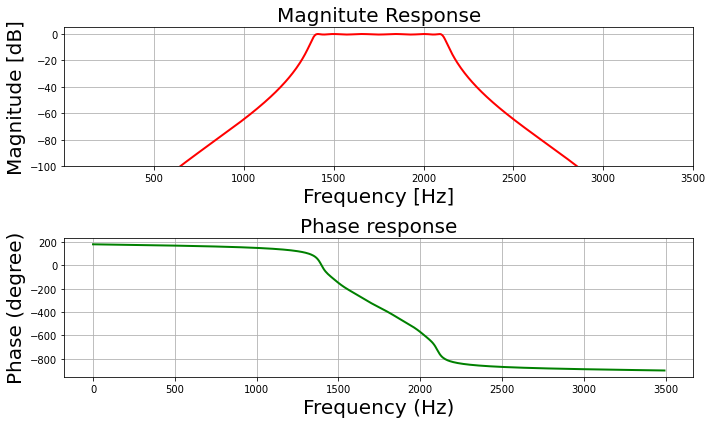

In [17]:
mfreqz(z,p,Fs)

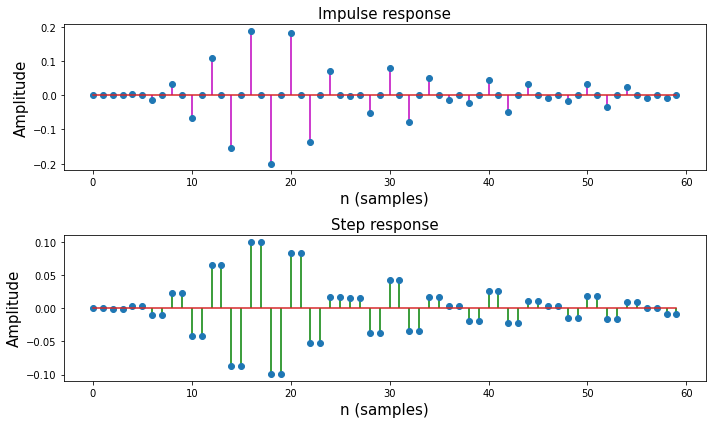

In [18]:
impz(z,p)